In [10]:
#Import Libraries
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## Question 01
### Apply the linear Transformations given

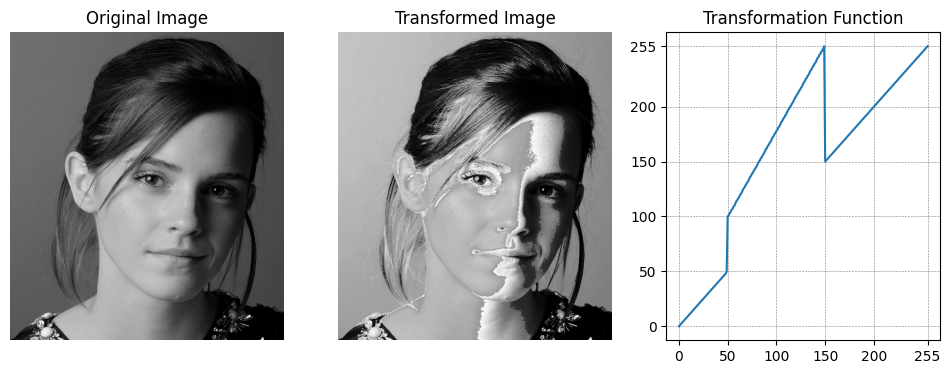

In [ ]:
c = np.array([(50, 50), (50, 100), (150, 255), (150, 150), (255, 255)])

t1 = np.linspace(0, c[0,1], c[0,0]).astype('uint8')                 #from 0 to 49 = 50 parts
t2 = np.linspace(c[1,1], c[2,1], c[2,0] - c[1,0]).astype('uint8')   #from 50 to 149 = 100 parts 
t3 = np.linspace(c[3,1], c[4,1], c[4,0] - c[3,0] + 1).astype('uint8') #from 150 to 255 = 106 parts

#Concatenate the three parts to form the complete transformation
transform = np.concatenate((t1, t2, t3), axis=0).astype('uint8')

#transform the image using the transformation function
f = cv.imread('a1images/emma.jpg', cv.IMREAD_GRAYSCALE)
g = transform[f]
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed Image')
for a in ax[0:2]:
    a.axis('off')
ax[2].plot(transform)
ax[2].set_xticks(list(np.arange(0, 201, 50)) + [255])  # Custom x-ticks (0,50,100,...,200,255)
#ax[2].set_xticks(np.arange(0, 256, 10), minor=True)  # Minor ticks for finer grid
ax[2].set_yticks(list(np.arange(0, 201, 50)) + [255])  # Custom y-ticks (0,50,100,...,200,255)
#ax[2].set_yticks(np.arange(0, 256, 10), minor=True)  # Minor ticks
ax[2].set_title('Transformation Function')
#show grid
ax[2].grid(which='both', color='gray', linestyle='--', linewidth=0.4)
plt.show()

## Question 02
#### Apply a similar operation as above (question 1) to accentuate the following in the brain proton density image shown
- (a)white matter
- (b) gray matter


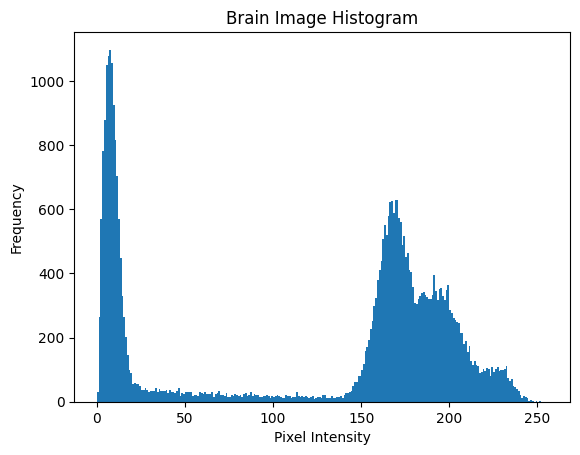

In [44]:
# Try to get an idea about the intensity distribution of the image to deceide whice transformation to apply when accentuating the gray matter and white matter
brain_img = cv2.imread('a1images/brain_proton_density_slice.png', cv2.IMREAD_GRAYSCALE)
plt.hist(brain_img.ravel(), bins=256, range=(0, 256))
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Brain Image Histogram')
plt.show()

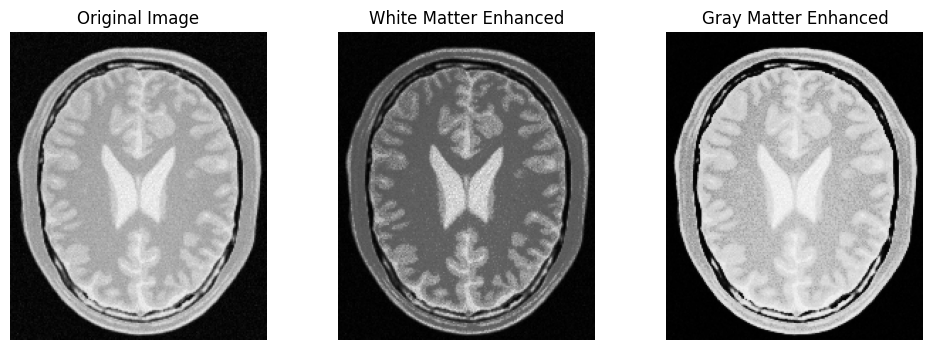

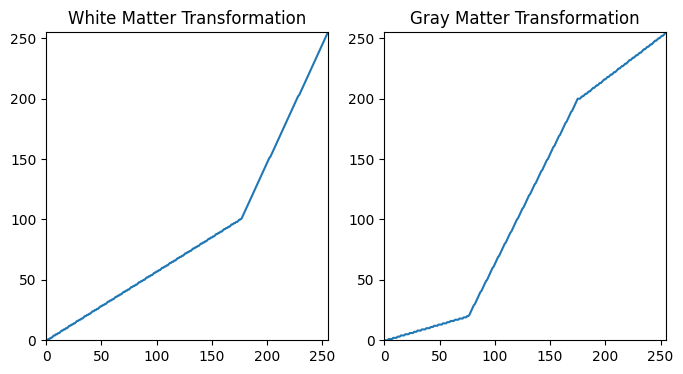

In [45]:
# White Matter Transformation
t1_wm = np.linspace(0, 100, 176).astype('uint8')  # from 0 to 175 = 176 parts
t2_wm = np.linspace(100, 255, 80).astype('uint8')  # from 176 to 255 = 80 parts
transform_wm = np.concatenate((t1_wm, t2_wm), axis=0).astype('uint8')

# Gray Matter Transformation
t1_gm = np.linspace(0, 20, 76).astype('uint8') # from 0 to 75 = 76 parts
t2_gm = np.linspace(20, 200, 100).astype('uint8')  # from 76 to 175 = 100 parts
t3_gm = np.linspace(200, 255, 80).astype('uint8')  # from 176 to 255 = 80 parts
transform_gm = np.concatenate((t1_gm, t2_gm, t3_gm), axis=0).astype('uint8')

# Load and transform the image 
f = cv.imread('a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
g_wm = transform_wm[f]  # white matter transformation
g_gm = transform_gm[f]  # gray matter transformation

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[1].imshow(g_wm, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('White Matter Enhanced')
ax[2].imshow(g_gm, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Gray Matter Enhanced')
for a in ax:
    a.axis('off')
plt.show()

# Transformation plots
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].plot(transform_wm)
ax[0].set_ylim([0, 255])
ax[0].set_xlim([0, 255])
ax[0].set_title('White Matter Transformation')
ax[1].plot(transform_gm)
ax[1].set_ylim([0, 255])
ax[1].set_xlim([0, 255])
ax[1].set_title('Gray Matter Transformation')
plt.show()

## Question 03
#### Consider the image shown
- (a) Apply gamma correction to the L plane in the L∗a∗ b∗ color space and state the γ value.
- (b) Show the histograms of the original and corrected images.

255 0


Text(0, 0.5, 'Output, $\\mathrm{t}[\\mathbf{L}]$')

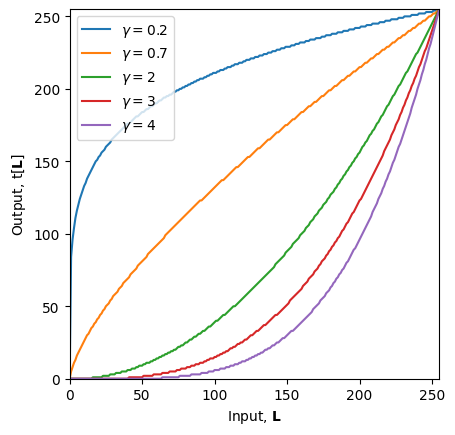

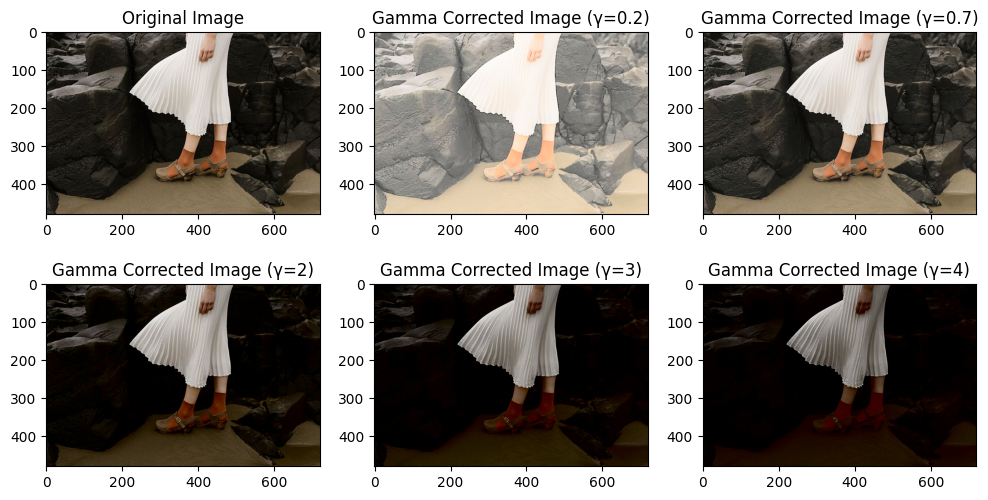

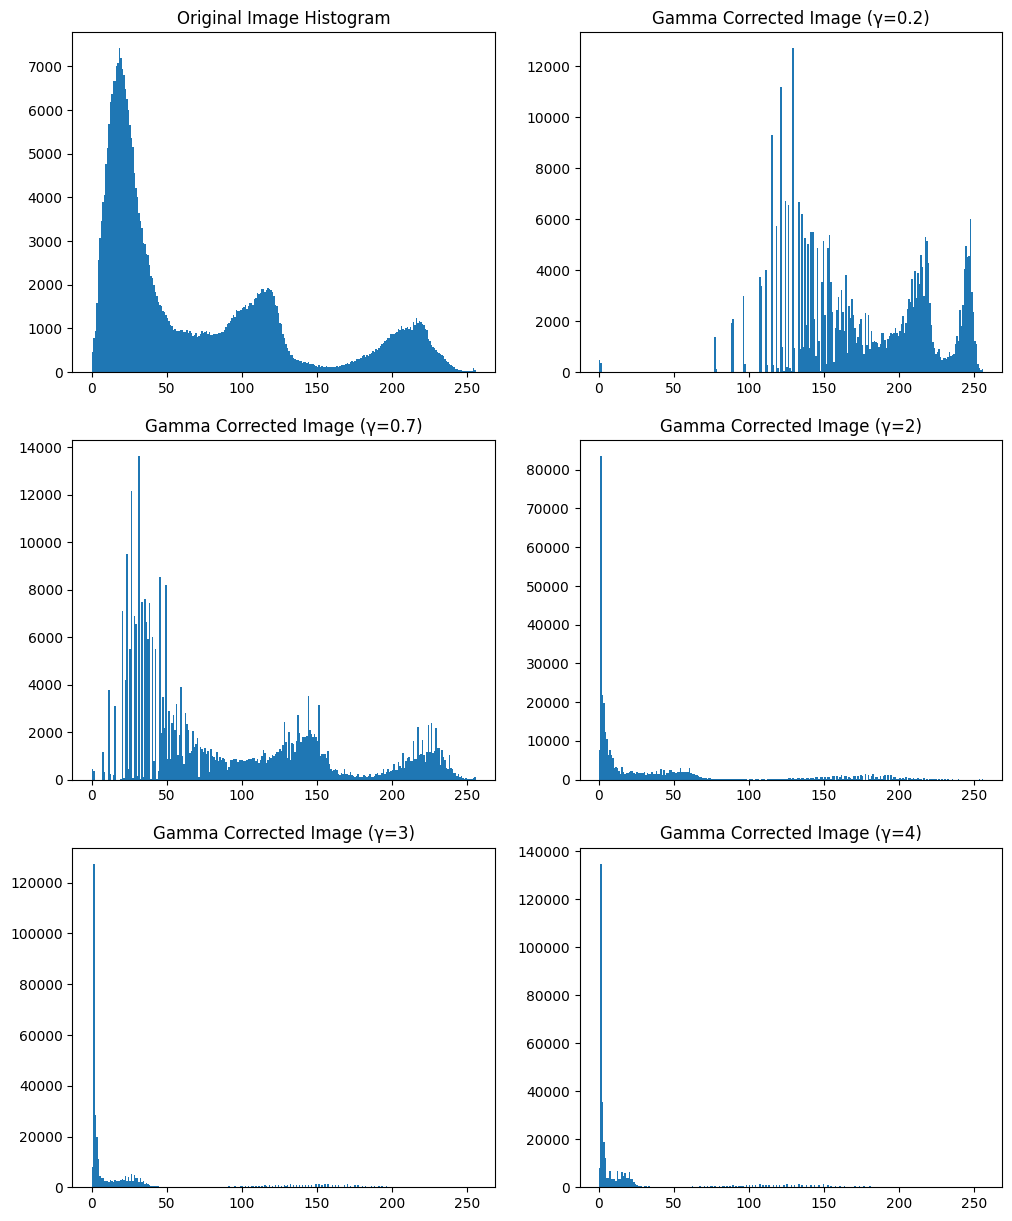

In [75]:
#load image in colour and show uisng matplotlib
image = cv.imread('a1images/highlights_and_shadows.jpg')
#Apply gamma correction to the L plane in the L∗a∗ b∗ color space and state the γ value.
image_lab = cv.cvtColor(image, cv.COLOR_BGR2Lab)
L,a,b = cv.split(image_lab)
print(np.max(L), np.min(L))  # Check the range of L channel
gamma_vals = [0.2,0.7,2,3,4]  
fig_gamma, ax_gamma = plt.subplots()
fig_images, ax_images = plt.subplots(2, 3, figsize=(12, 6))
fig_hist, ax_hist = plt.subplots(3, 2, figsize=(12, 15))


image_index = 0
ax_images[0, 0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax_images[0, 0].set_title('Original Image')
ax_hist[0,0].hist(cv.cvtColor(image, cv.COLOR_BGR2GRAY).ravel(), bins=256, range=(0, 256))
ax_hist[0,0].set_title('Original Image Histogram')
for gamma in gamma_vals:
  t = np.array([((i/255)**gamma)*255 for i in np.arange(0,256)]).astype(np.uint8)  # Gamma correction transformation
  #plot the curve
  ax_gamma.plot(t, label=fr'$\gamma = {gamma}$')

  L_corrected = cv.LUT(L, t)  # Apply gamma correction
  image_corrected = cv.merge((L_corrected, a, b))
  # Convert back to BGR color space
  image_corrected_bgr = cv.cvtColor(image_corrected, cv.COLOR_Lab2BGR)
  #plot the original and corrected images
  image_index += 1
  
  ax_images[image_index//3, image_index % 3].imshow(cv.cvtColor(image_corrected_bgr, cv.COLOR_BGR2RGB))
  ax_images[image_index//3, image_index % 3].set_title(f'Gamma Corrected Image (γ={gamma})')

  #plot the histograms
  grayscale_img = cv.cvtColor(image_corrected_bgr, cv.COLOR_BGR2GRAY)
  ax_hist[image_index//2, image_index % 2].hist(grayscale_img.ravel(), bins=256, range=(0, 256))
  ax_hist[image_index//2, image_index % 2].set_title(f'Gamma Corrected Image (γ={gamma})')
  

ax_gamma.legend(loc='upper left')
ax_gamma.set_xlim(0,255)
ax_gamma.set_ylim(0,255)
ax_gamma.set_aspect('equal')
ax_gamma.set_xlabel(r'Input, $\mathbf{L}$')
ax_gamma.set_ylabel(r'Output, $\mathrm{t}[\mathbf{L}]$')


##### Based on the output images, we can say that when $\gamma$ = 2, we get the best output.

## Question 04
$$
f(x) = \min\left(x + a \cdot 128 \cdot e^{-\frac{(x-128)^2}{2\sigma^2}}, 255\right)
$$
#### Increasing the vibrance of a photograph is probably achieved by applying an intensity transformation above to the saturation plane, where x is the input intensity, a ∈ [0, 1] and σ = 70. 
 - (a) Split the image shown in Fig. 4 into hue, saturation, and value planes.
 - (b) Apply the aforementioned intensity transformation to the saturation plane.
 - (c) Adjust a to get a visually pleasing output. Report the value of a.
 - (d) Recombine the three planes.
 - (e) Display the original image, vibrance-enhanced image, and the intensity transformation.

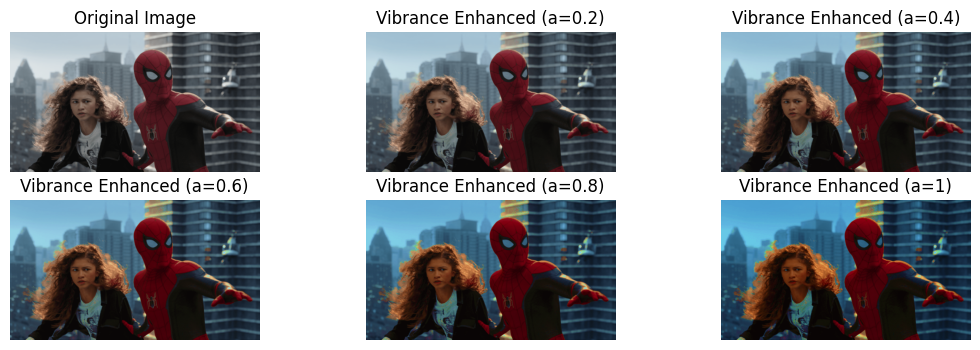

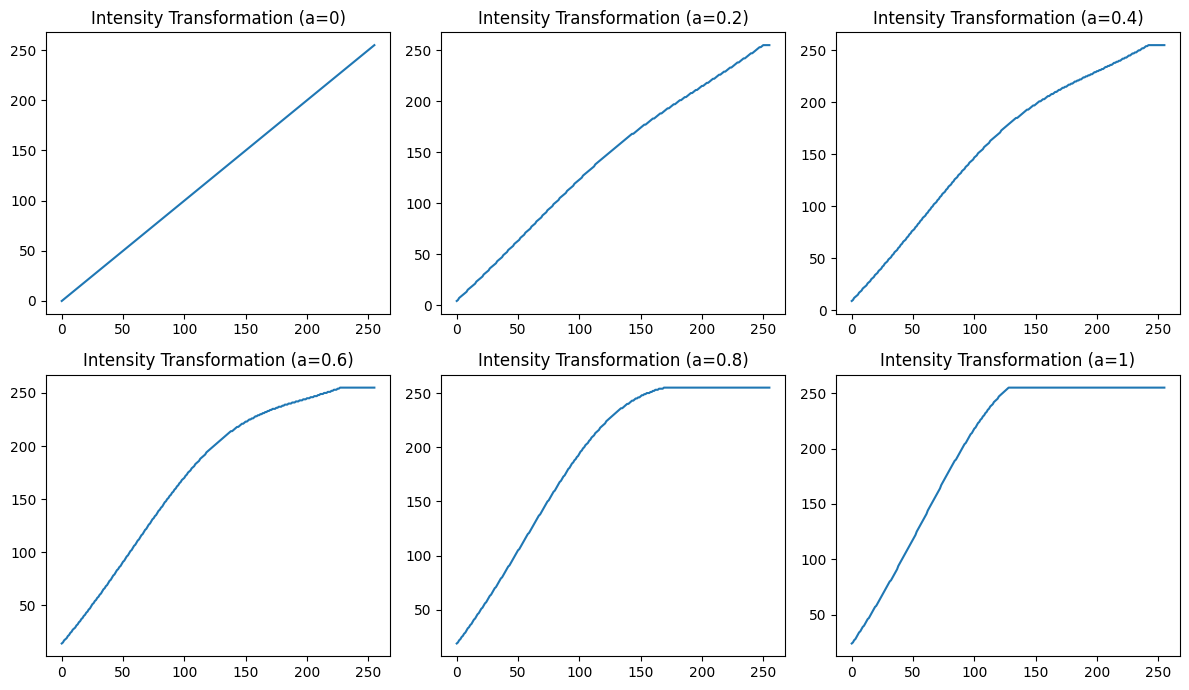

In [101]:
image = cv.imread('a1images/spider.png')

# (a) Split the image into hue, saturation, and value planes
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)
h, s, v = cv.split(hsv_image)
#print(np.max(s), np.min(s))  # Check the range of saturation channel
fig_images, ax_images = plt.subplots(2, 3, figsize=(13, 4))
fig_transformation, ax_transformation = plt.subplots(2, 3, figsize=(12, 7))

def vibrance_transformation(x, a, sigma=70):
  gaussian_part = a*128*np.exp(-((x-128)**2)/(2*sigma**2))
  return np.minimum(x + gaussian_part, 255).astype(np.uint8)

# (b) Apply the intensity transformation to the saturation plane
a_vals = [0,0.2,0.4,0.6,0.8,1]  # (c) Adjust a to get a visually pleasing output
s_transformed = [vibrance_transformation(s, a) for a in a_vals]

# (d) Recombine the three planes
index = 0
for (a_value, s_transformed_value) in zip(a_vals, s_transformed):
    hsv_transformed = cv.merge((h, s_transformed_value, v))
    # Convert back to BGR color space
    bgr_transformed = cv.cvtColor(hsv_transformed, cv.COLOR_HSV2BGR)
    # (e) Display the original image, vibrance-enhanced image, and the intensity transformation
    ax_images[index//3, index%3].imshow(cv.cvtColor(bgr_transformed, cv.COLOR_BGR2RGB))
    ax_images[index//3, index%3].set_title('Original Image' if index == 0 else f'Vibrance Enhanced (a={a_value})')

    # Plot the intensity transformation
    x = np.arange(0, 256)
    y = vibrance_transformation(x, a_value)
    ax_transformation[index//3, index%3].plot(x, y, label=f'a={a_value}')
    ax_transformation[index//3, index%3].set_title(f'Intensity Transformation (a={a_value})')

    index+=1

for a in ax_images.flatten():
    a.axis('off')
plt.tight_layout()
plt.show()



##### Judging by the results obtaiined from various a values we can conclude that the best output is obtained when using a = 0.2. The following are the finla results

Text(0.5, 1.0, 'Intensity Transformation (a=0.2)')

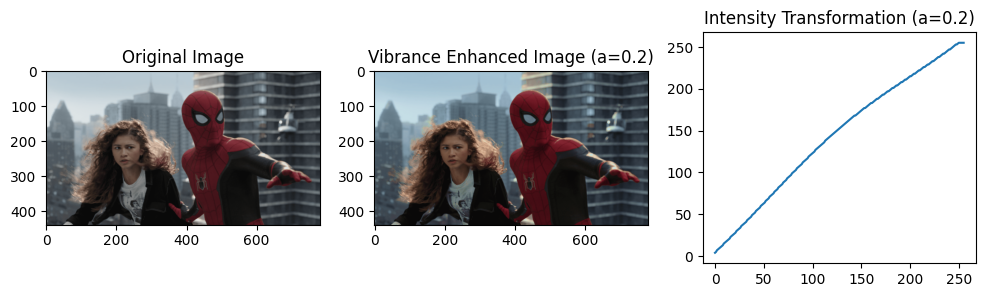

In [102]:
fig,ax = plt.subplots(1, 3, figsize=(12, 3))
best_a = 0.2
best_s_transformed = s_transformed[a_vals.index(best_a)]
hsv_best = cv.merge((h, best_s_transformed, v))
bgr_best = cv.cvtColor(hsv_best, cv.COLOR_HSV2BGR)
ax[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image') 
ax[1].imshow(cv.cvtColor(bgr_best, cv.COLOR_BGR2RGB))
ax[1].set_title('Vibrance Enhanced Image (a=0.2)')
ax[2].plot(vibrance_transformation(np.arange(0, 256), best_a))
ax[2].set_title('Intensity Transformation (a=0.2)')


## Question 05
#### Write a function of your own to carry out histogram equalization on the image shown in Fig. 5. Show the histograms before and after equalization.
$$
T(k) = \frac{L - 1}{M \cdot N} \sum_{j=0}^{k} n_j
$$


Text(0.5, 1.0, 'Histogram of Equalized Image')

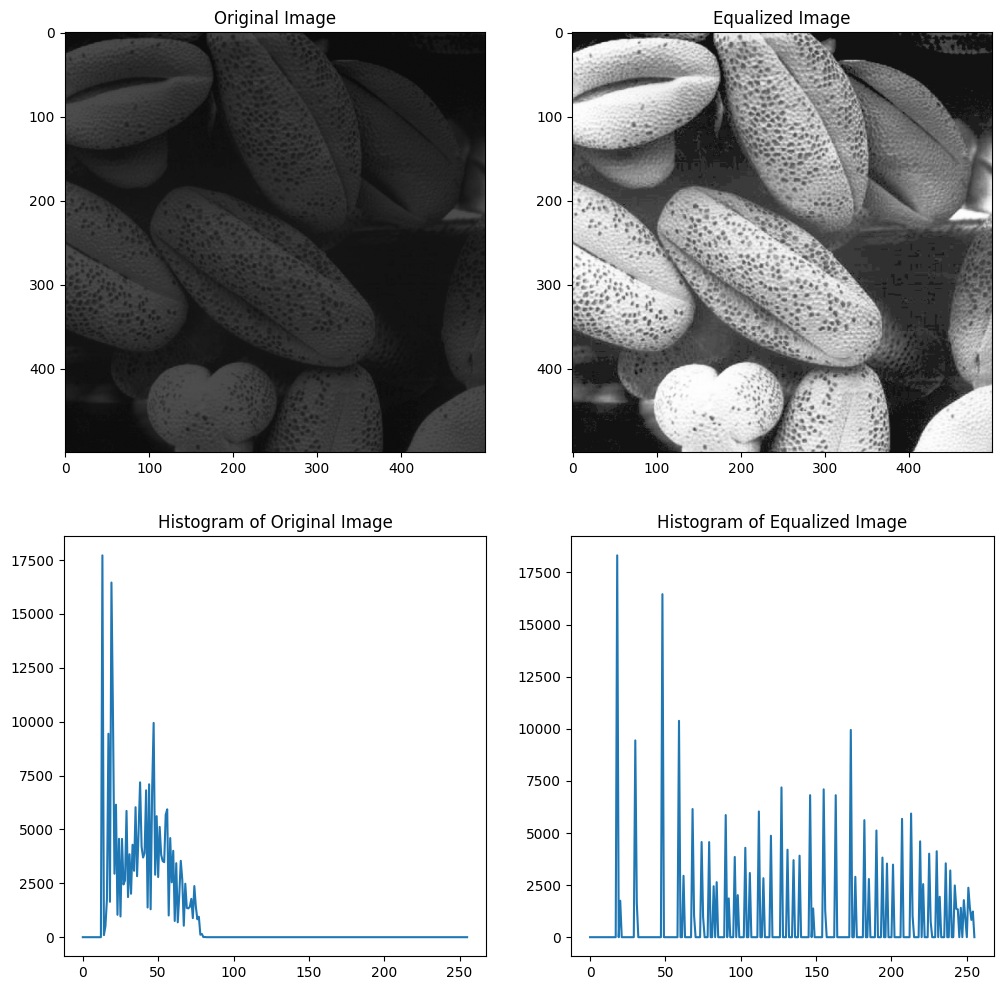

In [117]:
image = cv.imread('a1images/shells.tif', cv.IMREAD_GRAYSCALE)
M,N = image.shape[:2]
bits_per_pixel = 8
L = 2**bits_per_pixel
fig, ax = plt.subplots(2, 2, figsize=(12, 12))



def equalize_histogram(image):
  """  Function to perform histogram equalization on the input image."""
  hist , bins = np.histogram(image.flatten(), bins=L, range=(0, L-1))
  cdf = hist.cumsum()  # Cumulative distribution function
  t = np.array([(L-1)/(M*N)*cdf[i] for i in range(256)], dtype=np.uint8)
  #t = [(L-1)/(M*N)*cdf[i] for i in np.arange(0,256)].astype(unit8)
  return (t, hist, cdf)

t, hist, cdf = equalize_histogram(image)
g = t[image]

ax[0, 0].imshow(image, cmap='gray', vmin=0, vmax=255)
ax[0, 0].set_title('Original Image')
ax[1, 0].plot(hist)
ax[1, 0].set_title('Histogram of Original Image')


ax[0, 1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[0, 1].set_title('Equalized Image')
hist_eq, bins_eq = np.histogram(g.flatten(), bins=L, range=(0, L-1))
ax[1, 1].plot(hist_eq)  
ax[1, 1].set_title('Histogram of Equalized Image')

#print(hist_eq)



## Question 06
#### In this question, we will apply histogram equalization only to the foreground of an image to produce an image with a histogram equalized foreground.
- (a) Open the image in Fig. 6, split it into hue, saturation, and values and display these planes in grayscale.
- (b) Select the appropriate plane to threshold in extract the foreground mask. A mask is a binary image.
- (c) Now obtain the foreground only using cv.bitwise_and and compute the histogram.
- (d) Obtain the cumulative sum of the histogram using np.cumsum.
- (e) Use the formulas in slides to histogram-equalize the foreground.
- (f) Extract the background and add with the histogram equalized foreground.
#### Show the hue, saturation, and value plane, the mask, the original image, and the result with the histogram-equalized foreground.

Text(0.5, 1.0, 'Value Plane')

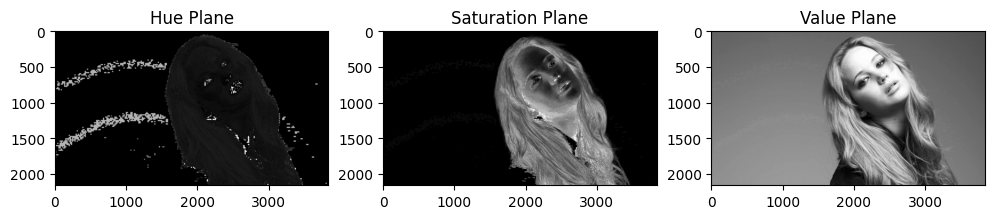

In [137]:
image = cv.imread('a1images/jeniffer.jpg')
# (a)Split the image into hue, saturation, and value planes
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)
h, s, v = cv.split(hsv_image)
#display the planes in grayscale
fig, ax = plt.subplots(1, 3, figsize=(12, 5))
ax[0].imshow(h, cmap='gray')
ax[0].set_title('Hue Plane')
ax[1].imshow(s, cmap='gray')
ax[1].set_title('Saturation Plane')
ax[2].imshow(v, cmap='gray')
ax[2].set_title('Value Plane')

#### From this we can deceide that the best plane to threshold to get the forground mask is the saturation plane. Saturation measures colour purity and and as we can see in the saturation plane the foreground is shown more dominantly as foreground objects tend to have high saturation compared to background objects. So we will use the saturation plane for the mask extraction

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


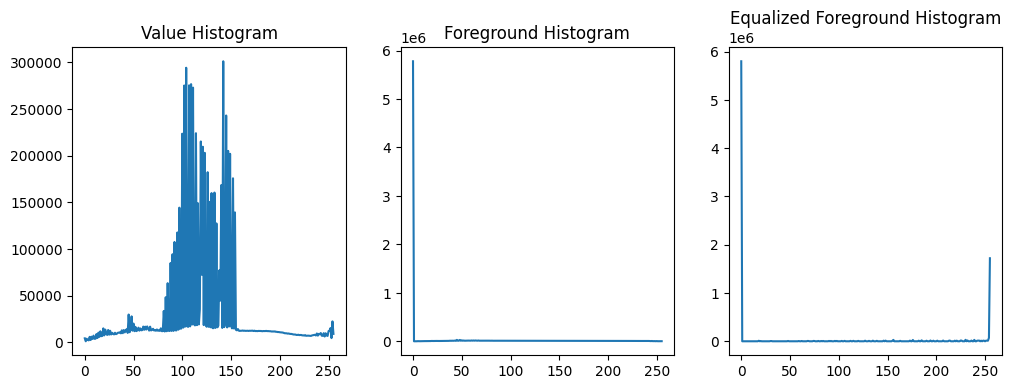

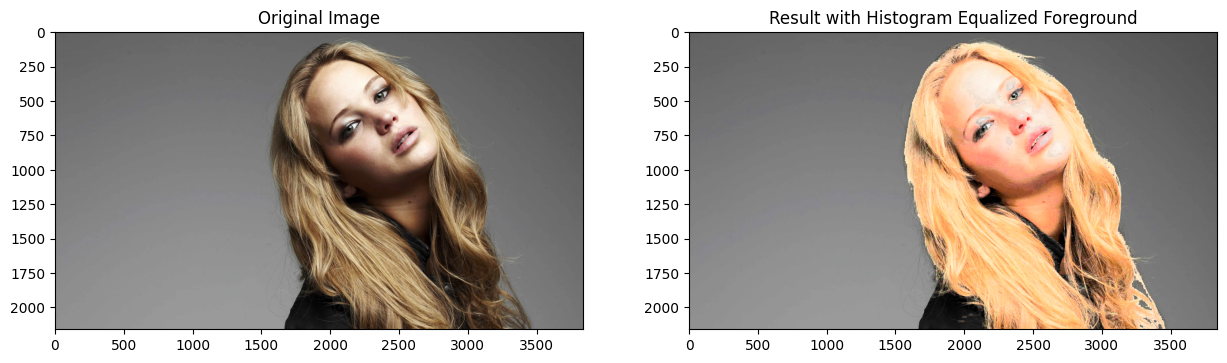

In [156]:
threshold_value = 40  # Threshold value for saturation. This can be adjusted to get the best output
# (b) Select the appropriate plane to threshold in extract the foreground mask.
th, mask = cv.threshold(s, threshold_value, 255, cv.THRESH_BINARY)  # Thresholding the saturation plane

# (c) Now obtain the foreground only using cv.bitwise_and and compute the histogram.
foreground = cv.bitwise_and(v, v, mask=mask)

hist_v, bins_v = np.histogram(v.flatten(), bins=256, range=(0, 255))
hist_sat, bins_sat = np.histogram(s.flatten(), bins=256, range=(0, 255))
hist_sat[0] = 0  # Set the first bin to 0 to avoid counting the background
hist_foreground, bins_foreground = np.histogram(foreground.flatten(), bins=256, range=(0, 255))

# (d) Obtain the cumulative sum of the histogram using np.cumsum.
cdf_foreground = np.cumsum(hist_foreground)

# (e) Use the formulas in slides to histogram-equalize the foreground.
t = np.array([(L-1)/(M*N)*cdf[i] for i in range(256)], dtype=np.uint8)

foreground_eq = t[foreground]
hist_foreground_eq, bins_foreground_eq = np.histogram(foreground_eq.flatten(), bins=256, range=(0, 255))

background = cv.bitwise_and(v, v, mask=cv.bitwise_not(mask))
result_v = cv.add(background, foreground_eq)
result_hsv = cv.merge((h, s, result_v))
result_bgr = cv.cvtColor(result_hsv, cv.COLOR_HSV2BGR)

fig_hist, ax_hist = plt.subplots(1, 3, figsize=(12, 4))
ax_hist[0].plot(hist_v, label='Value Histogram')
ax_hist[0].set_title('Value Histogram')
ax_hist[1].plot(hist_foreground, label='Foreground Histogram')
ax_hist[1].set_title('Foreground Histogram')
ax_hist[2].plot(hist_foreground_eq, label='Equalized Foreground Histogram')
ax_hist[2].set_title('Equalized Foreground Histogram')

fig_img, ax_img = plt.subplots(1, 2, figsize=(15, 5))
ax_img[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax_img[0].set_title('Original Image')
ax_img[1].imshow(cv.cvtColor(result_bgr, cv.COLOR_BGR2RGB))
ax_img[1].set_title('Result with Histogram Equalized Foreground')

print(foreground)

For comparison between several threashold values the following code can be used

Text(0.5, 1.0, 'Original Image')

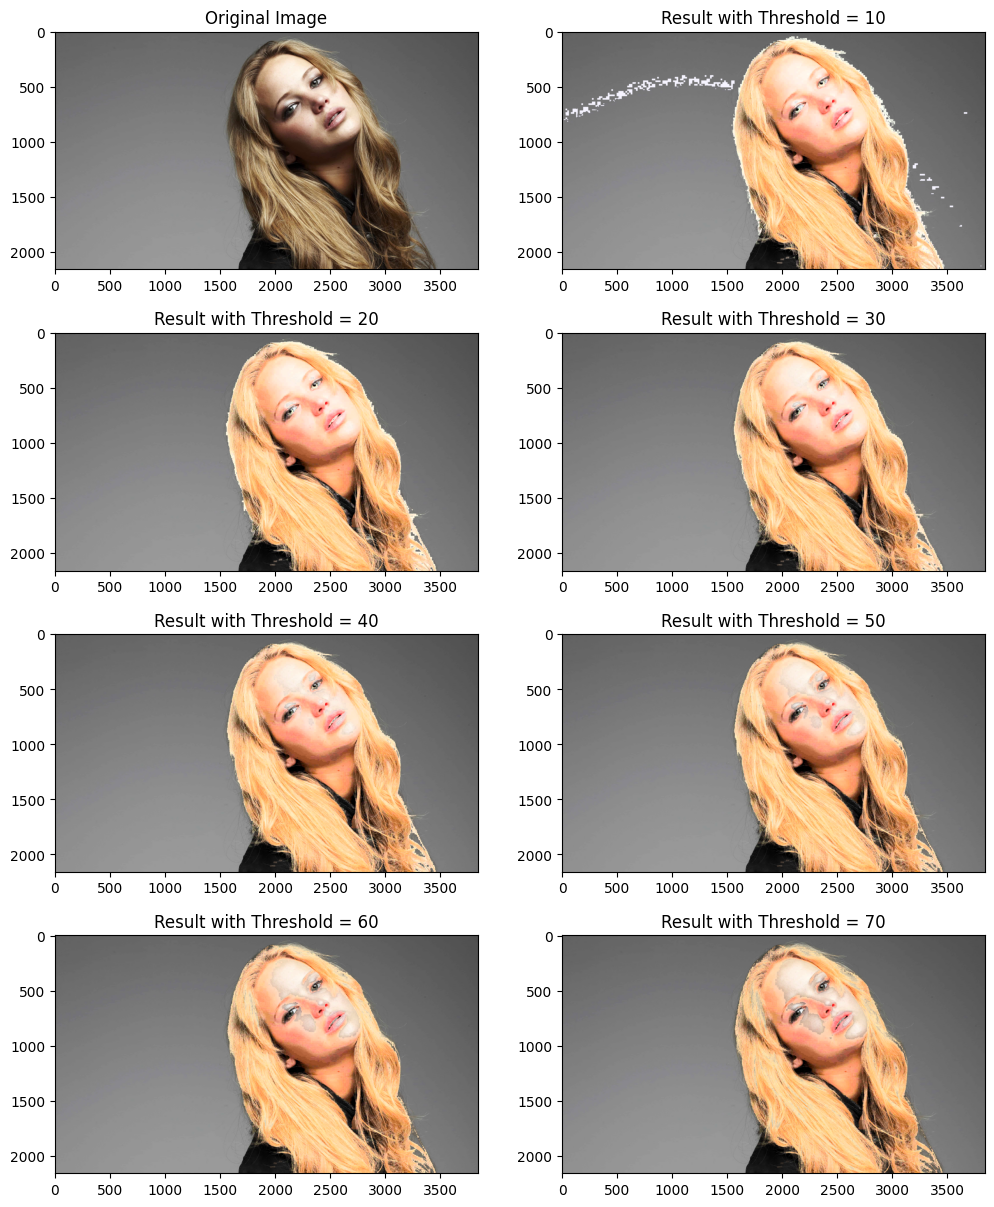

In [159]:
threshold_values = [10,20,30,40,50,60,70]
fig_img, ax_img = plt.subplots(4, 2, figsize=(12, 15))
for index, threshold_value in enumerate(threshold_values,1):
  # (b) Select the appropriate plane to threshold in extract the foreground mask.
  th, mask = cv.threshold(s, threshold_value, 255, cv.THRESH_BINARY)  # Thresholding the saturation plane

  # (c) Now obtain the foreground only using cv.bitwise_and and compute the histogram.
  foreground = cv.bitwise_and(v, v, mask=mask)

  hist_foreground, bins_foreground = np.histogram(foreground.flatten(), bins=256, range=(0, 255))

  # (d) Obtain the cumulative sum of the histogram using np.cumsum.
  cdf_foreground = np.cumsum(hist_foreground)

  # (e) Use the formulas in slides to histogram-equalize the foreground.
  t = np.array([(L-1)/(M*N)*cdf[i] for i in range(256)], dtype=np.uint8)

  foreground_eq = t[foreground]
  hist_foreground_eq, bins_foreground_eq = np.histogram(foreground_eq.flatten(), bins=256, range=(0, 255))

  background = cv.bitwise_and(v, v, mask=cv.bitwise_not(mask))
  result_v = cv.add(background, foreground_eq)
  result_hsv = cv.merge((h, s, result_v))
  result_bgr = cv.cvtColor(result_hsv, cv.COLOR_HSV2BGR)


  ax_img[index//2,index%2].imshow(cv.cvtColor(result_bgr, cv.COLOR_BGR2RGB))
  ax_img[index//2,index%2].set_title(f'Result with Threshold = {threshold_value}')

ax_img[0,0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax_img[0,0].set_title('Original Image')



So we can conclude that the histogram equalization of the foreground in the HSV color space can significantly enhance the visibility of features in the image, especially when using appropriate threshold values for the saturation channel. In this case the most suitable value for the threshold is around 30

## Question 07